## A1: Predicting Car Price

### Task 1: Data Preparation and Modeling

#### 1. Import libraries and check version libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import matplotlib
warnings.filterwarnings('ignore')

In [2]:
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.9.4')

#### 2. Load data

In [3]:
df = pd.read_csv('Cars.csv')

In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of data
df.shape

(8128, 13)

In [6]:
# Show basic statistics (count, mean, std, min, max, percentile)
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Dtypes of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### 3. Data cleaning and preprocessing

- For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [9]:
# Define the custom mapping
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df["owner"] = df["owner"].map(owner_mapping)    # Apply the mapping to the 'owner' column
print(df["owner"].unique()) # Display unique mapped

[1 2 3 4 5]


In [10]:
# Check data after mapping
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


- For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmpl for Diesel and Petrol

<Axes: xlabel='fuel', ylabel='count'>

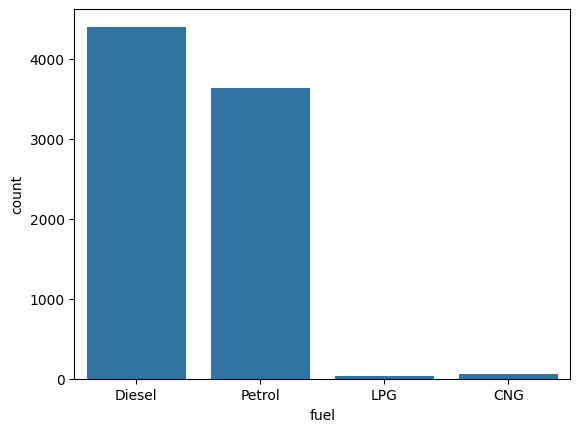

In [11]:
# Check number of row are CNG and LPG
sns.countplot(data = df, x = 'fuel')

In [12]:
# Check what index in the fuel column contains a value for CNG or LPG
index_to_drop = df[df["fuel"].isin(["CNG", "LPG"])].index

# Count number of rows
num_to_drop = len(index_to_drop)

# Show number of rows must remove and show the index contains a value for CNG or LPG
print(f"Number of rows to drop: {num_to_drop}")
print(f"Index to drop: {index_to_drop.tolist()}")

Number of rows to drop: 95
Index to drop: [6, 35, 90, 203, 402, 866, 870, 1225, 1239, 1350, 1511, 1658, 1907, 2047, 2108, 2166, 2253, 2312, 2466, 2481, 2484, 2513, 2518, 2525, 2527, 2573, 2579, 2588, 2613, 2618, 2730, 2740, 2758, 2767, 3010, 3042, 3050, 3200, 3216, 3306, 3466, 3492, 3751, 3796, 3823, 3826, 3853, 3908, 3912, 3956, 4004, 4045, 4542, 4545, 4933, 5034, 5057, 5133, 5185, 5198, 5199, 5206, 5277, 5322, 5436, 5437, 5457, 5532, 5557, 5578, 5749, 5768, 5784, 5789, 5792, 5793, 5815, 6007, 6253, 6338, 6488, 6536, 6651, 6856, 7040, 7101, 7112, 7166, 7245, 7300, 7308, 7543, 7642, 7733, 7913]


In [13]:
rows_before = len(df)   # Before remove
df = df.drop(index_to_drop) # Remove row are CNG and LPG
rows_after = len(df)    # After remove

print(f"Rows before drop: {rows_before}")
print(f"Rows after drop: {rows_after}")

Rows before drop: 8128
Rows after drop: 8033


<Axes: xlabel='fuel', ylabel='count'>

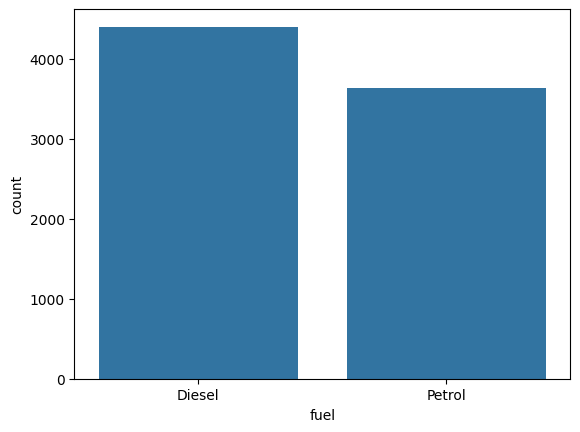

In [14]:
# Check fuel column again
sns.countplot(data = df, x = 'fuel')

- For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split

In [15]:
df["mileage"] = df["mileage"].str.split(" ").str[0].astype(float)   # Split by space and keep only the first part

In [16]:
# Check 'mileage' column to verify the transformation
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [17]:
# Check the data type
print(df["mileage"].dtypes)

float64


- For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [18]:
df["engine"] = df["engine"].str.split(" ").str[0].astype(float)   # Split by space and keep only the first part

In [19]:
# Check 'engine' column to verify the transformation
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [20]:
# Check the data type
print(df["engine"].dtypes)

float64


- For the feature max_power, remove “bhp” and convert the column to numerical type (e.g., float)

In [21]:
df["max_power"] = df["max_power"].str.split(" ").str[0].astype(float)   # Split by space and keep only the first part

In [22]:
# Check 'max_power' column to verify the transformation
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [23]:
# Check the data type
print(df["max_power"].dtypes)

float64


- For the feature brand, take only the first word and remove the rest

In [24]:
df["name"] = df["name"].str.split(" ").str[0]   # Split by space and keep only the first part

In [25]:
# Check 'name' column to verify the transformation
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [26]:
# Check the data type
print(df["name"].dtypes)

object


- Drop the feature torque, simply because Chaky’s company does not understand well about it

In [27]:
df = df.drop('torque', axis='columns')  # dropping a column torque

In [28]:
# Check after remove column "torque"
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


- You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to involve this, we will simply delete all samples related to it.

dtype('int64')

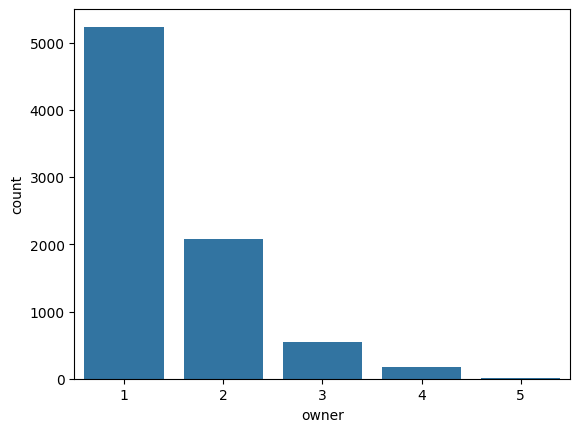

In [29]:
# Check number of row are "Test Drive Cars"
sns.countplot(data = df, x = 'owner')

'''
For mapping
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
'''

df["owner"].dtypes

In [30]:
# Check what index in the owner column contains a value '5'
index_to_drop_owner = df[df["owner"].isin([5])].index

# Count number of rows
num_to_drop_owner = len(index_to_drop_owner)

# Show number of rows must remove and show the index contains a value '5'
print(f"Number of rows to drop: {num_to_drop_owner}")
print(f"Index to drop: {index_to_drop_owner.tolist()}")

Number of rows to drop: 5
Index to drop: [4383, 4950, 4951, 4952, 6220]


In [31]:
rows_before = len(df)   # Before remove
df = df.drop(index_to_drop_owner) # Remove row is '5'
rows_after = len(df)    # After remove

print(f"Rows before drop: {rows_before}")
print(f"Rows after drop: {rows_after}")

Rows before drop: 8033
Rows after drop: 8028


<Axes: xlabel='owner', ylabel='count'>

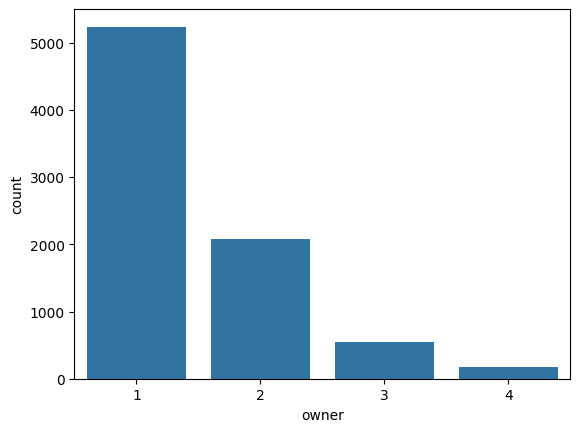

In [32]:
# Check data again
sns.countplot(data = df, x = 'owner')

- Since selling price is a big number, it can cause your prediction to be very unstable. One trick is to first transform the label using log transform, i.e., "y = np.log(df['selling_price'])"

In [33]:
df['selling_price'] = np.log(df['selling_price'])   # log transformation

In [34]:
# Check data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


Now the dataset has been cleaned as per the instructions in the document.

- Check each data

<Figure size 1000x600 with 0 Axes>

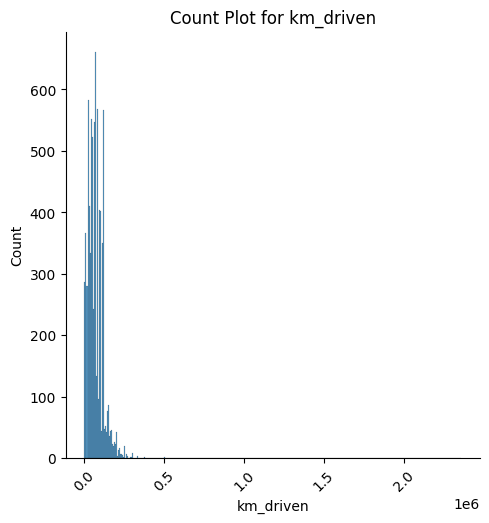

<Figure size 1000x600 with 0 Axes>

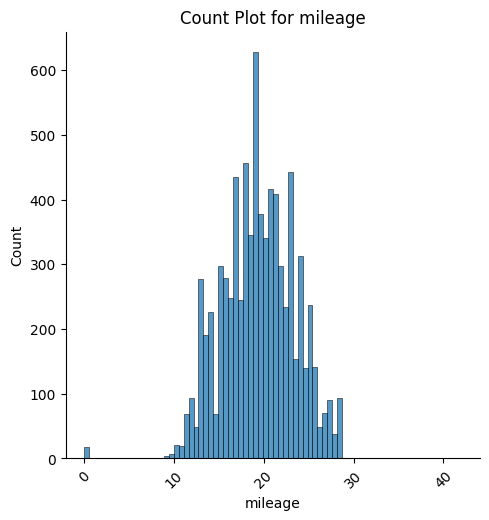

<Figure size 1000x600 with 0 Axes>

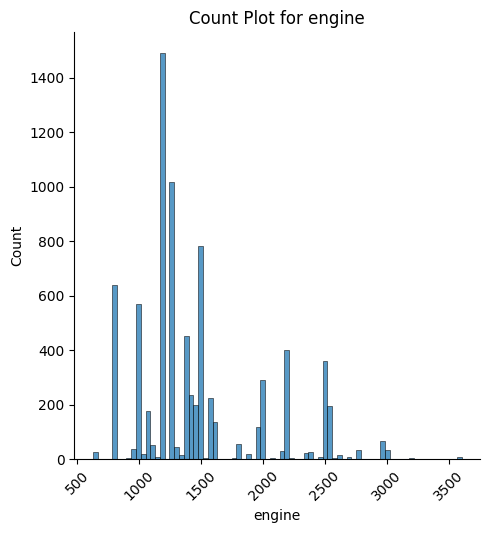

<Figure size 1000x600 with 0 Axes>

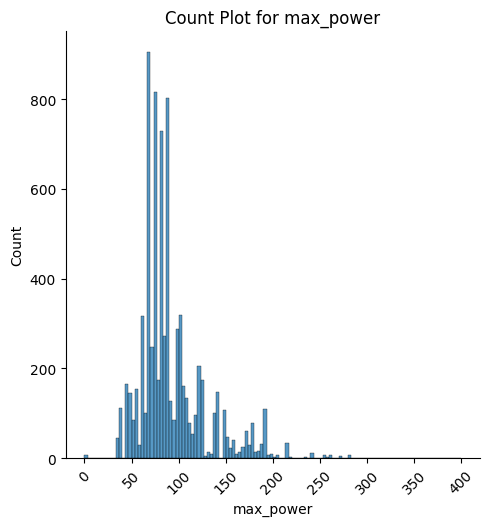

<Figure size 1000x600 with 0 Axes>

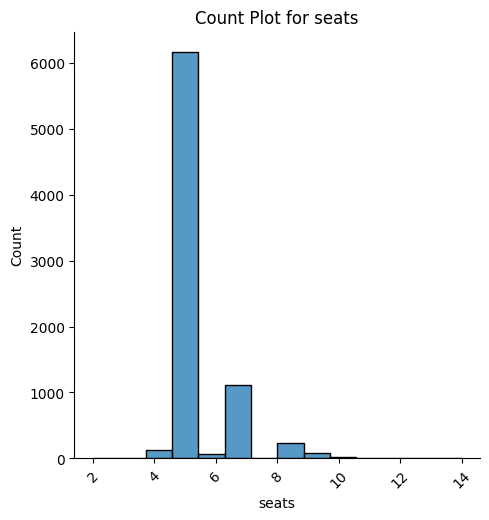

In [35]:
columns_dis = ['km_driven', 'mileage', 'engine', 
           'max_power', 'seats']

# Loop through each column and create a count plot
for column in columns_dis:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.displot(data=df, x=column)
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

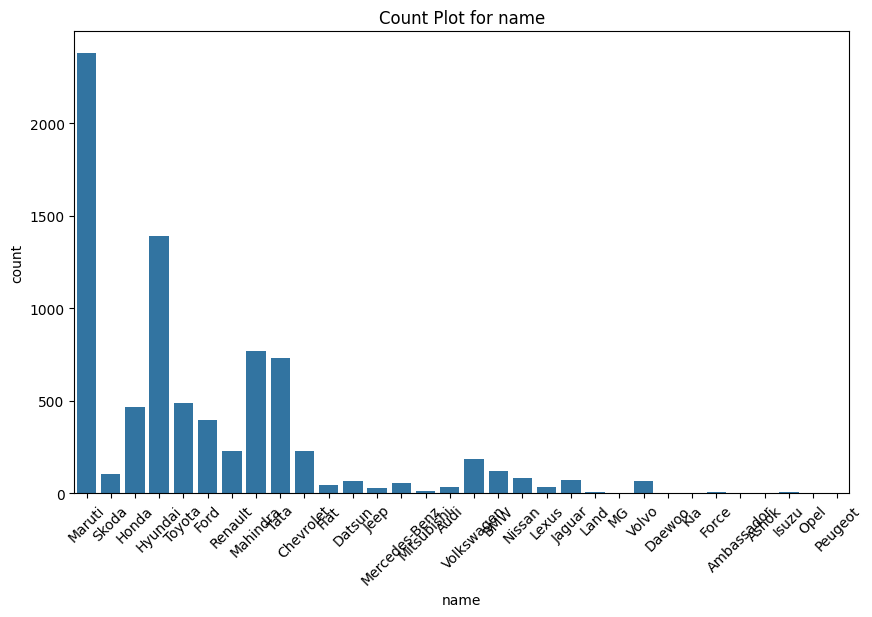

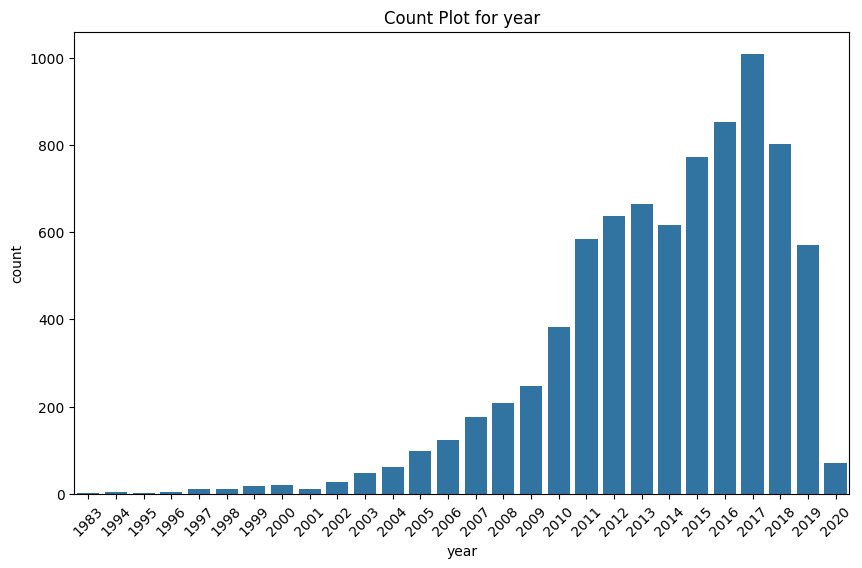

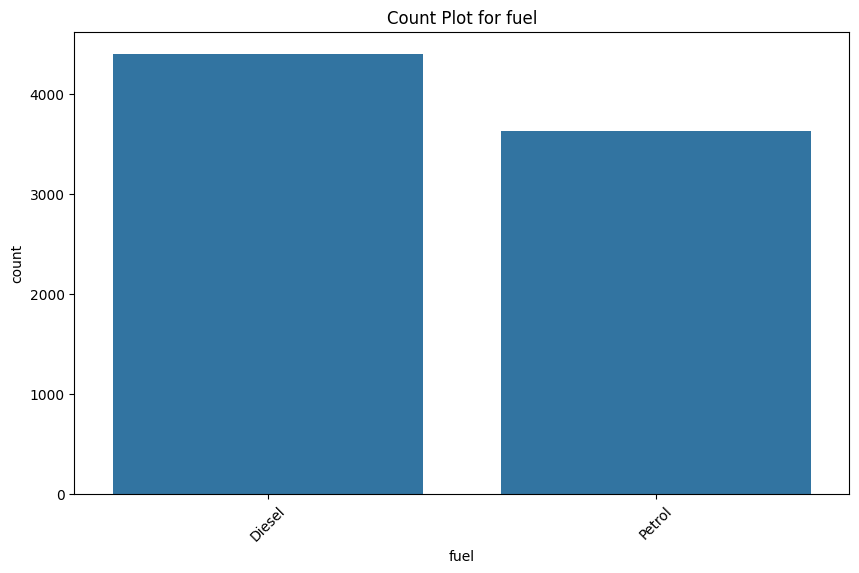

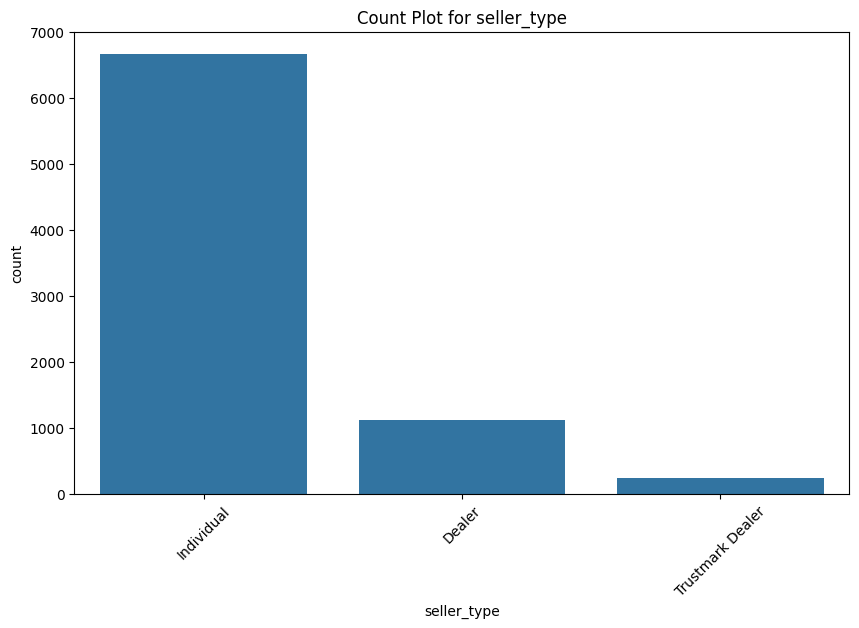

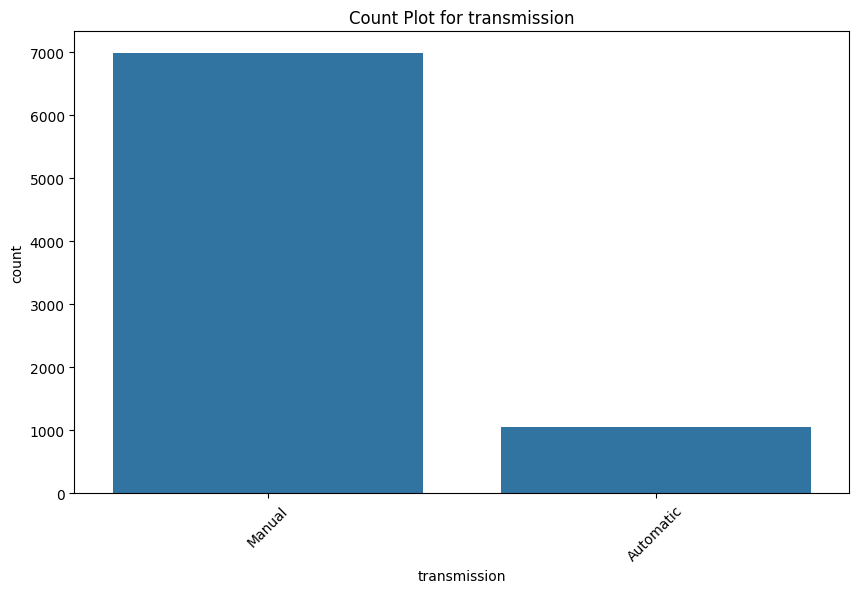

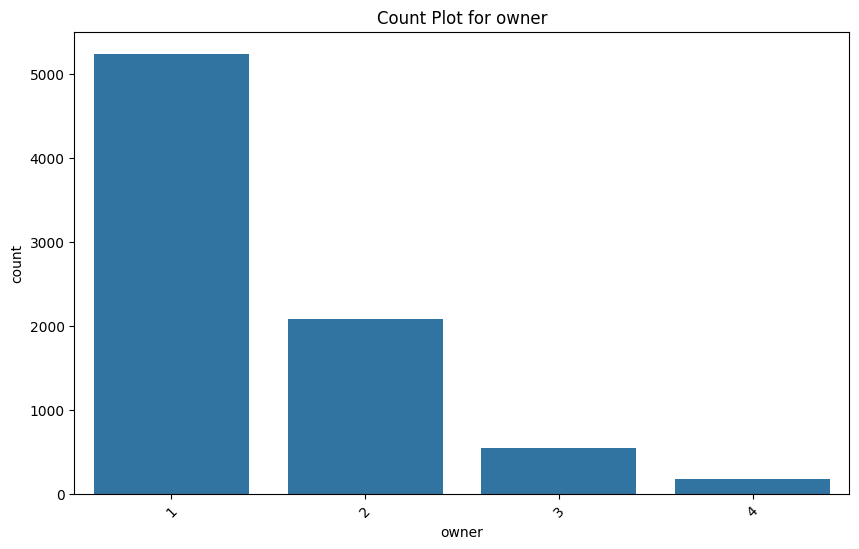

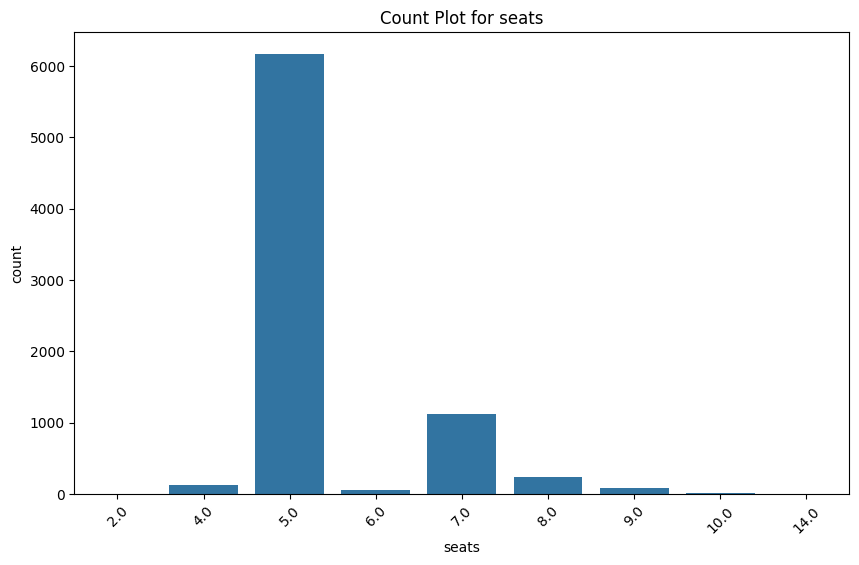

In [36]:
# Create count plots for the specified columns
columns = ['name', 'year', 'fuel', 'seller_type', 
           'transmission', 'owner', 'seats']

# Loop through each column and create a count plot
for column in columns:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

- Feature selection

In [37]:
#x is our strong features
X = df[        ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']        ]

#y is simply the selling_price col
y = df["selling_price"]

- After I get cleaned data I will split data to train set and test set

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

- Preprocessing train data

In [39]:
#check for null values
X_train[['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']].isna().sum()

name              0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         154
engine          154
max_power       149
seats           154
dtype: int64

In [40]:
X_test[['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']].isna().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         60
engine          60
max_power       59
seats           60
dtype: int64

In [41]:
y_train.isna().sum()

np.int64(0)

In [42]:
y_test.isna().sum()

np.int64(0)

Preprocessing for mileage data

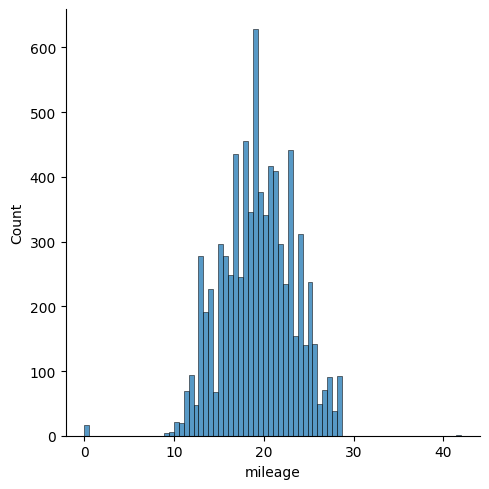

In [43]:
sns.displot(data=df, x='mileage')

In [44]:
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)

Preprocessing for engine data

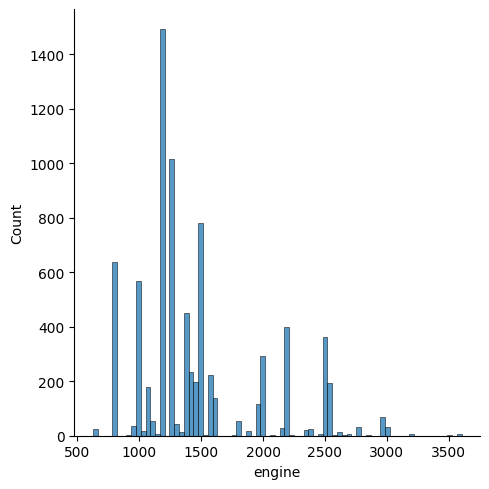

In [45]:
sns.displot(data=df, x='engine')

In [46]:
df.engine.mean(), df.engine.median()

(np.float64(1462.9146403890454), np.float64(1248.0))

In [47]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

Preprocessing for max power data

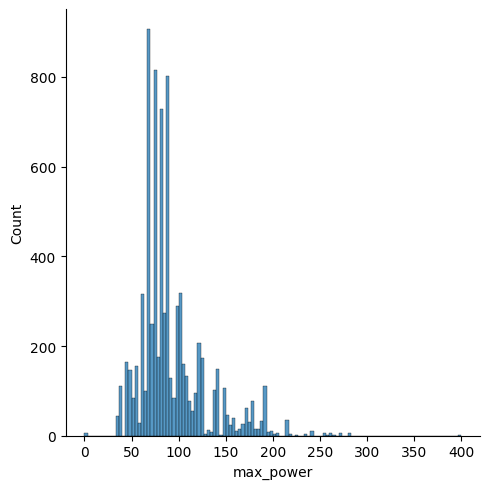

In [48]:
sns.displot(data=df, x='max_power')

In [49]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

Preprocessing for seats data

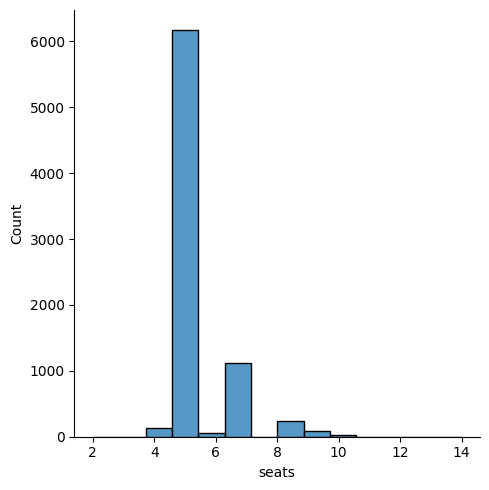

In [50]:
sns.displot(data=df, x='seats')

In [51]:
X_train['seats'].fillna(X_train['seats'].median(), inplace=True)
X_test['seats'].fillna(X_train['seats'].median(), inplace=True)

In [52]:
#for missing y,  you don't replace them, you just delete them.
#don't forget to delete the associated x values as well
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

In [53]:
# Check again
X_train[['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']].isna().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [54]:
X_test[['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']].isna().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [55]:
y_train.isna().sum()

np.int64(0)

In [56]:
y_test.isna().sum()

np.int64(0)

Checking Outliers

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


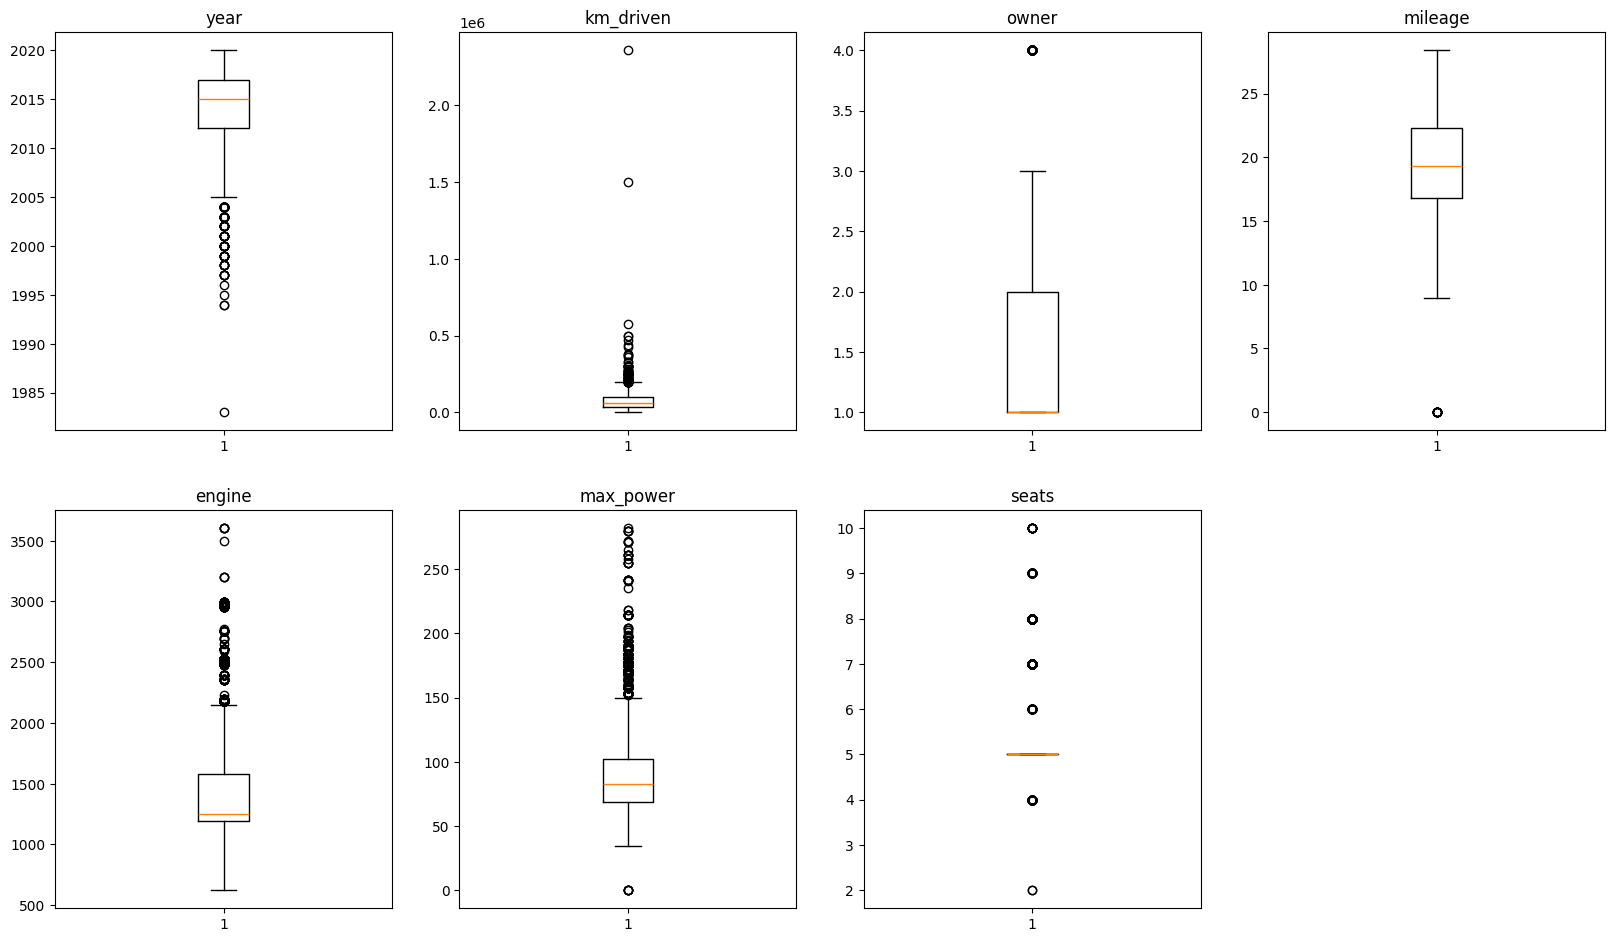

In [58]:
# Create a dictionary of columns.
# col_dict = {'name':1,'year':2,'km_driven':3,'fuel':4,'seller_type':5,'transmission':6,'owner':7,'mileage':8,'engine':9,'max_power':10,'seats':11}
col_dict = {'year':1,'km_driven':2,'owner':3,'mileage':4,'engine':5,'max_power':6,'seats':7}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [59]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [60]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%

---------------owner---------------

Number of outliers: 110
Percent of data that is outlier: 1.96%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------seats---------------

Number of outliers: 1158
Percent of data that is outlier: 20.61%


Because there are some data features that should be mapping before training are name, fuel, seller_type and transmission

In [61]:
fuel_mapping = {'Diesel': 1, 'Petrol': 2}
seller_type_mapping = {'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3}
transmission_mapping = {'Manual': 1, 'Automatic': 2}

X_train['fuel'] = X_train['fuel'].map(fuel_mapping)
X_train['seller_type'] = X_train['seller_type'].map(seller_type_mapping)
X_train['transmission'] = X_train['transmission'].map(transmission_mapping)

X_test['fuel'] = X_test['fuel'].map(fuel_mapping)
X_test['seller_type'] = X_test['seller_type'].map(seller_type_mapping)
X_test['transmission'] = X_test['transmission'].map(transmission_mapping)

In [62]:
X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6853,Chevrolet,2015,120000,1,1,1,1,13.58,2499.0,72.40,10.0
1495,Mahindra,2013,90000,1,1,1,2,15.96,2523.0,62.10,7.0
7904,Maruti,2013,92000,1,1,1,3,20.77,1248.0,88.76,7.0
1281,Tata,2010,100000,1,1,1,2,18.80,1248.0,90.00,5.0
1421,Hyundai,2010,120000,1,1,1,3,23.00,1396.0,90.00,5.0


In [63]:
X_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5948,Tata,2011,35000,2,1,1,1,15.00,1368.0,90.00,5.0
6039,Hyundai,2016,110000,1,1,1,1,19.67,1582.0,126.20,5.0
3069,Maruti,2015,60000,2,1,1,1,20.51,998.0,67.04,5.0
6531,Renault,2014,80000,1,1,1,1,19.01,1461.0,108.45,5.0
322,Hyundai,2018,29000,1,1,1,1,24.00,1186.0,73.97,5.0


In [64]:
from sklearn.preprocessing import LabelEncoder

# Cerate LabelEncoder object
label_encoder = LabelEncoder()

# Apply fit_transform to all data before splitting.
X_all = pd.concat([X_train, X_test], axis=0)

# Perform LabelEncoder on the 'name' feature.
X_all['name'] = label_encoder.fit_transform(X_all['name'])

# Split the data back into X_train and X_test.
X_train = X_all.iloc[:len(X_train), :]
X_test = X_all.iloc[len(X_train):, :]

In [76]:
name_mapping_df = pd.DataFrame({
    'Original Name': label_encoder.classes_,
    'Encoded Value': range(len(label_encoder.classes_))
})

print(name_mapping_df)

    Original Name  Encoded Value
0      Ambassador              0
1           Ashok              1
2            Audi              2
3             BMW              3
4       Chevrolet              4
5          Daewoo              5
6          Datsun              6
7            Fiat              7
8           Force              8
9            Ford              9
10          Honda             10
11        Hyundai             11
12          Isuzu             12
13         Jaguar             13
14           Jeep             14
15            Kia             15
16           Land             16
17          Lexus             17
18             MG             18
19       Mahindra             19
20         Maruti             20
21  Mercedes-Benz             21
22     Mitsubishi             22
23         Nissan             23
24           Opel             24
25        Peugeot             25
26        Renault             26
27          Skoda             27
28           Tata             28
29        

In [65]:
X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6853,4,2015,120000,1,1,1,1,13.58,2499.0,72.40,10.0
1495,19,2013,90000,1,1,1,2,15.96,2523.0,62.10,7.0
7904,20,2013,92000,1,1,1,3,20.77,1248.0,88.76,7.0
1281,28,2010,100000,1,1,1,2,18.80,1248.0,90.00,5.0
1421,11,2010,120000,1,1,1,3,23.00,1396.0,90.00,5.0


In [66]:
X_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5948,28,2011,35000,2,1,1,1,15.00,1368.0,90.00,5.0
6039,11,2016,110000,1,1,1,1,19.67,1582.0,126.20,5.0
3069,20,2015,60000,2,1,1,1,20.51,998.0,67.04,5.0
6531,26,2014,80000,1,1,1,1,19.01,1461.0,108.45,5.0
322,11,2018,29000,1,1,1,1,24.00,1186.0,73.97,5.0


Scaling data

In [67]:
from sklearn.preprocessing import StandardScaler
import joblib

# Select only high-value features for scaling
features_to_scale = ['km_driven', 'mileage', 'engine', 'max_power']

scaler = StandardScaler()

X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [69]:
X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6853,4,2015,0.830335,1,1,1,1,-1.472315,2.084278,-0.547545,10.0
1495,19,2013,0.331836,1,1,1,2,-0.871732,2.132328,-0.838350,7.0
7904,20,2013,0.365070,1,1,1,3,0.342052,-0.420314,-0.085646,7.0
1281,28,2010,0.498003,1,1,1,2,-0.155069,-0.420314,-0.050636,5.0
1421,11,2010,0.830335,1,1,1,3,0.904783,-0.124008,-0.050636,5.0


In [70]:
X_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5948,28,2011,-0.582079,2,1,1,1,-1.113984,-0.180066,-0.050636,5.0
6039,11,2016,0.664169,1,1,1,1,0.064471,0.248378,0.971416,5.0
3069,20,2015,-0.166663,2,1,1,1,0.276442,-0.920833,-0.698877,5.0
6531,26,2014,0.165670,1,1,1,1,-0.102077,0.006127,0.470272,5.0
322,11,2018,-0.681778,1,1,1,1,1.157129,-0.544443,-0.503219,5.0


Check Null again

In [71]:
X_train[['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']].isna().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [72]:
X_test[['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']].isna().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [73]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 11)
Shape of X_test:  (2409, 11)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


#### 4. Modeling

For the 3 ML that I use is Linear Regression which is suitable for continuous value prediction problems and Random Forest Regressor which is suitable for continuous value prediction problems as well as Linear Regression but the model is more flexible and works well in many cases and finally Support Vector Machine (SVM) is suitable for both Classification and Regression problems (SVM for Regression).

- Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
yhat = model_lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.09355862979893988
r2:  0.8670261796011438


Linear Regression can tell which features have a linear relationship with the target variable by using the values ​​of the coefficients. If the coefficient of a feature is high, it means that the feature is highly important.

In [74]:
coefficients = model_lr.coef_
feature_names = X_train.columns
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_importance_lr)

         Feature  Coefficient
0           name    -0.002024
1           year     0.110488
2      km_driven    -0.016925
3           fuel    -0.187226
4    seller_type     0.091436
5   transmission     0.211359
6          owner    -0.059051
7        mileage     0.038624
8         engine     0.116229
9      max_power     0.349247
10         seats     0.022257


In [75]:
# Save the model using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model_lr, file)

- Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
yhat = model_rf.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.04434092538028989
r2:  0.9369787451942294


Random Forest uses feature importance to decide which features are important by measuring which features help to separate the data the most. Features with high importance values ​​are more influential in predicting.

In [77]:
feature_importance_rf = model_rf.feature_importances_
feature_names_rf = X_train.columns
feature_importance_rf_df = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importance_rf})
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)
print(feature_importance_rf_df)

         Feature  Importance
1           year    0.446767
9      max_power    0.397876
8         engine    0.065728
2      km_driven    0.025807
7        mileage    0.021235
0           name    0.020030
6          owner    0.006643
10         seats    0.006581
3           fuel    0.005449
5   transmission    0.001993
4    seller_type    0.001892


In [78]:
# Save the model using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

- Support Vector Machine (SVM)

In [79]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)
yhat = model_svr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.6693953066861199
r2:  0.04859603567937287


SVR does not directly assess feature importance like Random Forest, but it can use Permutation Feature Importance to examine which features changes will affect the model accuracy.

In [80]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_svr, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_svr = pd.DataFrame({'Feature': X_train.columns, 'Importance': result.importances_mean})
feature_importance_svr = feature_importance_svr.sort_values(by='Importance', ascending=False)
print(feature_importance_svr)

         Feature  Importance
1           year    0.047815
9      max_power    0.002458
8         engine    0.001400
6          owner    0.000497
2      km_driven    0.000284
10         seats    0.000264
0           name    0.000194
3           fuel    0.000151
4    seller_type    0.000132
5   transmission    0.000125
7        mileage    0.000002


In [81]:
# Save the model using pickle
with open('support_vector_model.pkl', 'wb') as file:
    pickle.dump(model_svr, file)

### 5. Testing

To evaluate the performance of the predictive model, I use the Mean Squared Error (MSE), which measures the error between the predicted and actual values, with lower values ​​indicating a better model performance. It is calculated by taking the square of the difference between the predicted and actual values, and the R² (Coefficient of Determination) is used to measure how much variation in the data the model can explain, with values ​​closer to 1 being better. It represents the percentage of variation in the data that can be explained by the model.

In [82]:
# LinearRegression model
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

yhat_loaded_model = loaded_model.predict(X_test)

print("Linear Regression Model")
print("MSE: ", mean_squared_error(y_test, yhat_loaded_model))
print("r2: ", r2_score(y_test, yhat_loaded_model))

# RandomForestRegressor
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

yhat_loaded_model = loaded_model.predict(X_test)

print("Random Forest Model")
print("MSE: ", mean_squared_error(y_test, yhat_loaded_model))
print("r2: ", r2_score(y_test, yhat_loaded_model))

# SVR
with open('support_vector_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

yhat_loaded_model = loaded_model.predict(X_test)

print("SVR Model")
print("MSE: ", mean_squared_error(y_test, yhat_loaded_model))
print("r2: ", r2_score(y_test, yhat_loaded_model))

Linear Regression Model
MSE:  0.09355862979893988
r2:  0.8670261796011438
Random Forest Model
MSE:  0.04434092538028989
r2:  0.9369787451942294
SVR Model
MSE:  0.6693953066861199
r2:  0.04859603567937287


### 6.Inference

In testing the performance of the model in predicting data, Linear Regression, Random Forest Regressor, and SVR were used. The Random Forest Regressor was found to be the best model, with the lowest MSE (0.0443) and highest R² (0.9370), which means that this model can predict close to the true value and can explain 93.7% of the variance in the data.

While Linear Regression has a relatively low MSE and a good R², it is not as good as Random Forest, while SVR has the highest MSE (0.6694) and lowest R² (0.0486), indicating that this model does not capture the characteristics of the data as well as the first two models.

Therefore, Random Forest Regressor is considered the best performing model for predicting this dataset and for use in my web application.

### Task 2: Analysis and Report

- Which features significantly impact predictions, and which do not? Why?

Based on the results from the three models (Linear Regression, Random Forest, and SVR), we can identify which features significantly impact predictions.

In Linear Regression, the most impactful features are year, fuel, transmission, engine, and max_power. These features have the highest coefficients, meaning they have a stronger relationship with the target variable. For example, max_power has a positive coefficient of 0.349, indicating that higher engine power positively affects the prediction. On the other hand, name has a very small negative coefficient (-0.002), suggesting it has a minimal effect on predictions.

For Random Forest, the most important features are year, max_power, and engine, which have the highest feature importance values. This suggests that these features play a significant role in the model's predictions. In comparison, fuel, transmission, and seller_type have very low importance, indicating they do not significantly affect the outcome.

In SVR, the feature importance values are very low across most features, with year and max_power still having the highest importance, but much lower than in the Random Forest model. This shows that the SVR model struggles more to capture the relationships between the features and the target variable, especially compared to the Random Forest model.

In conclusion, year, max_power, and engine are the most important features across all models, while features like name, fuel, and seller_type have less impact on predictions. The importance of these features varies across the models, with Random Forest showing the strongest feature importance values.

- Which algorithms performed well, and which did not? Why? (Although you have not studied algorithms in depth yet, you can explore online resources to develop an intuition.)

Based on the results, the Random Forest algorithm performed the best, followed by Linear Regression, and SVR performed the worst.

Random Forest performed well because it is an ensemble method that uses multiple decision trees to make predictions. It works by combining the output of many trees to reduce overfitting and improve prediction accuracy. Since Random Forest can handle complex data patterns, it did well in this case.

Linear Regression also performed well because it is a simple and efficient model when there is a clear linear relationship between the features and the target variable. In this case, Linear Regression was able to capture the linear trends but didn't perform as well as Random Forest, which can handle more complex patterns.

SVR (Support Vector Regression), on the other hand, performed poorly. SVR works well with non-linear data, but in this case, it couldn't capture the relationships in the data as effectively as the other two models. This could be due to the difficulty in tuning the hyperparameters for SVR, which requires careful adjustments, or because the dataset may not have strong non-linear relationships.

In summary, Random Forest is a more flexible and powerful algorithm for this type of data, while Linear Regression and SVR struggled due to their assumptions about data patterns.

### Task 3: Deployment

This is my web application

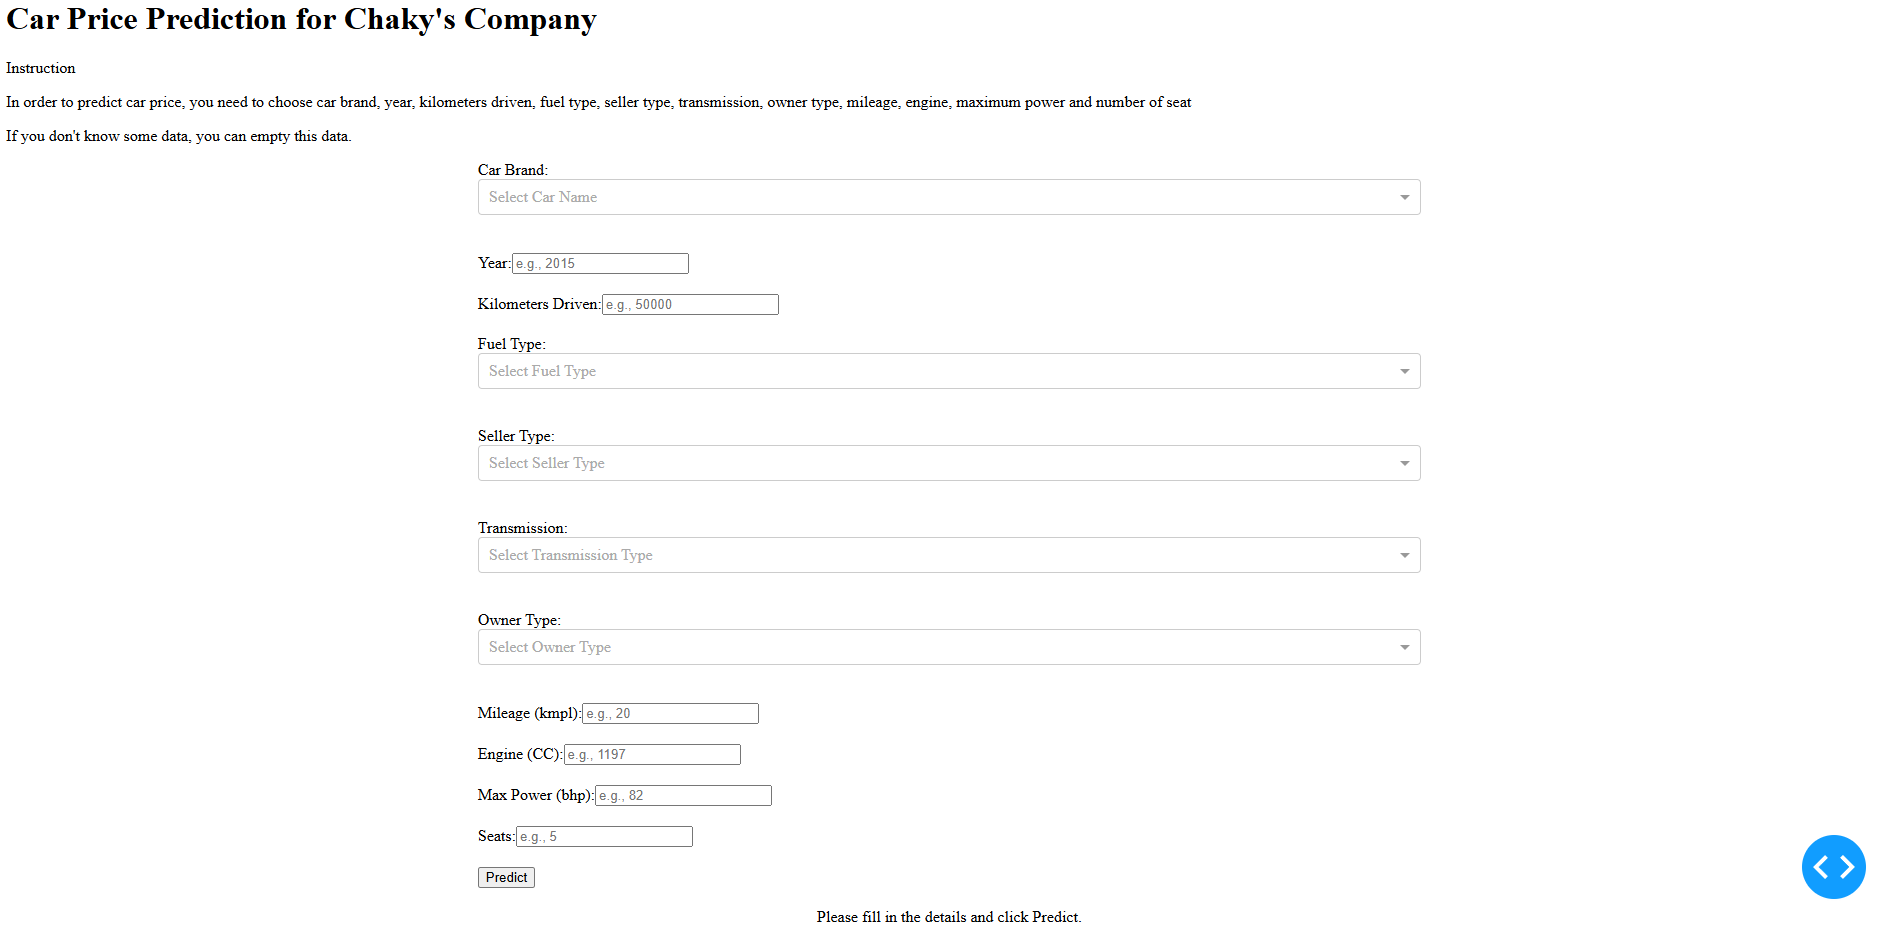

It is work on my  local environment.